# Data Science Challenge

In [143]:
# If additional packages are needed but are not installed by default, uncomment the last two lines of this cell
# and replace <package list> with a list of additional packages.
# This will ensure the notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [144]:
# for tensorflow

import sys
!{sys.executable} -m pip install tensorflow

In [145]:
# for xgboost sklearn

import sys
!{sys.executable} -m pip install xgboost sklearn

In [146]:
# Libraries
import pandas as pd
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | Unique identifier for each booking.
`lead_time` | Time between booking date and reservation date (in days)
`arrival_week` | Week number of the arrival date.
`duration` | Booking duration (in Days)
`prev_cancel` | Number of previous bookings that were cancelled by the customer prior to the current booking.
`booking_changes` | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation. 
`waiting_period` | Waiting period for booking confirmation (in Days)	
`per_Day_price` | Per night booking price (in US $).
`parking` | Number of car parking spaces required by the customer.
`special_request` | Number of special requests made by the customer.
`segment` | Market segment designation. In categories, “TA” means “Travel Agents” and “TO” means “Tour Operators”.
`deposit` | Whether the customer made a deposit to guarantee the booking.
`cust_type` | Type of booking, assuming one of four categories.
`is_cancelled` |Value indicating if the booking was cancelled (1) or not (0).

## Data Wrangling & Visualization

In [147]:
# The dataset is already loaded below
data = pd.read_csv("train.csv")

In [148]:
data.head()

,id,lead_time,arrival_week,duration,prev_cancel,booking_changes,waiting_period,per_Day_price,parking,special_request,segment,deposit,cust_type,is_cancelled
0,200,245,13,5,0,0,0,78.26,0,2,Online TA,No Deposit,Transient,0
1,201,170,25,2,0,0,0,130.50,0,0,Online TA,No Deposit,Transient,0
2,202,304,45,3,0,0,0,89.00,0,0,Offline TA/TO,Non Refund,Transient,1
3,203,19,7,1,0,0,0,82.13,0,2,Online TA,No Deposit,Transient,0
4,204,214,27,4,0,0,0,89.10,0,1,Direct,No Deposit,Transient-Party,0


In [149]:
#Explore columns
data.columns

Index(['id', 'lead_time', 'arrival_week', 'duration', 'prev_cancel',
       'booking_changes', 'waiting_period', 'per_Day_price', 'parking',
       'special_request', 'segment', 'deposit', 'cust_type', 'is_cancelled'],
      dtype='object')

In [150]:
#Description
data.describe()

,id,lead_time,arrival_week,duration,prev_cancel,booking_changes,waiting_period,per_Day_price,parking,special_request,is_cancelled
count,3000.000000,3000.0000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1699.500000,110.8670,27.215333,2.187333,0.084667,0.189000,3.325000,104.660693,0.022333,0.547667,0.409667
std,866.169729,112.8239,13.414008,1.449692,0.392704,0.569257,20.426611,38.304952,0.147790,0.786512,0.491854
min,200.000000,0.0000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,949.750000,23.0000,17.000000,1.000000,0.000000,0.000000,0.000000,79.000000,0.000000,0.000000,0.000000
50%,1699.500000,75.0000,28.000000,2.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000
75%,2449.250000,166.0000,38.000000,3.000000,0.000000,0.000000,0.000000,125.000000,0.000000,1.000000,1.000000
max,3199.000000,629.0000,53.000000,18.000000,11.000000,13.000000,391.000000,313.670000,1.000000,5.000000,1.000000


## Visualization, Modeling, Machine Learning

Build a classification model and to determine whether a customer will cancel a booking. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model's performance will be evaluated on the basis of accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [151]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()
print(len(test_data))

1000


In [160]:
# procedure:
#     1. finalize basic back up submission  ----> done
#     2. find points of interests for 2-3 column (in order words, describe the most
#        important features of the model to management)
#     3. start seeing ranges, other manipulations of dataframes you can make
#    4. look up RandomForestRegressor and how it works

In [161]:
########### ATTEMPT AT PROCEDURE # 1  
# Read the data


# pull data into target (y) and predictors (X)
train_y = data[0:999].is_cancelled
print(train_y)

0      0
1      0
2      1
3      0
4      0
      ..
994    1
995    0
996    0
997    0
998    0
Name: is_cancelled, Length: 999, dtype: int64


In [162]:
predictor_cols = ['lead_time', 'arrival_week', 'duration', 'prev_cancel']

# Create training predictors data
my_formatted_data = data[0:999]
train_X = my_formatted_data[predictor_cols]
train_X.head()

,lead_time,arrival_week,duration,prev_cancel
0,245,13,5,0
1,170,25,2,0
2,304,45,3,0
3,19,7,1,0
4,214,27,4,0


In [165]:
import sklearn
from sklearn.ensemble import RandomForestRegressor

my_model = RandomForestRegressor()
my_model.fit(train_X, train_y)
# Treat the test data in the same way as training data. In this case, pull same columns.
test_X = my_formatted_data[predictor_cols]
# Use the model to make predictions
predicted_cancellations = my_model.predict(test_X)
# We will look at the predicted prices to ensure we have something sensible.
print(len(predicted_cancellations))

999


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [166]:
my_sample_submission = pd.DataFrame({'Id': test_data[0:999].id, 'is_cancelled': predicted_cancellations})
print(my_sample_submission)

       Id  is_cancelled
0    3200           0.1
1    3201           0.5
2    3202           1.0
3    3203           0.3
4    3204           0.1
..    ...           ...
994  4194           0.8
995  4195           0.4
996  4196           0.0
997  4197           0.0
998  4198           0.0

[999 rows x 2 columns]


In [167]:
############# end of attempt at procedure #1 (it worked! probably turn this in due to time)
print("end of attempt at procedure #1 (it worked! probably turn this in due to time")

end of attempt at procedure #1 (it worked! probably turn this in due to time



**Describe the the most important features of the model to management.**

> #### Task:
- **Visualize the top 10 features and their feature importance.**


In [152]:
############ATTEMPT AT PROCEDURE # 2
# For reference
# 'id', 'lead_time', 'arrival_week', 'duration', 'prev_cancel',
#        'booking_changes', 'waiting_period', 'per_Day_price', 'parking',
#        'special_request', 'segment', 'deposit', 'cust_type', 'is_cancelled'],
#       dtype='object'
# id	Unique identifier for each booking.
# lead_time	Time between booking date and reservation date (in days)
# arrival_week	Week number of the arrival date.
# duration	Booking duration (in Days)
# prev_cancel	Number of previous bookings that were cancelled by the customer prior to the current booking.
# booking_changes	Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.
# waiting_period	Waiting period for booking confirmation (in Days)
# per_Day_price	Per night booking price (in US $).
# parking	Number of car parking spaces required by the customer.
# special_request	Number of special requests made by the customer.
# segment	Market segment designation. In categories, “TA” means “Travel Agents” and “TO” means “Tour Operators”.
# deposit	Whether the customer made a deposit to guarantee the booking.
# cust_type	Type of booking, assuming one of four categories.
# is_cancelled	Value indicating if the booking was cancelled (1) or not (0).      
      

In [153]:
#########ATTEMPT AT #3 (did this one before finishing ATTEMPT #2)
#importing plot entities

import seaborn as sbn
import matplotlib.pyplot as plt

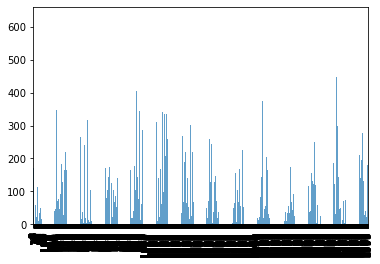

In [154]:
lead_times = data['lead_time']
fig = plt.figure()
ax = lead_times.plot(kind="bar", alpha=0.7)


In [155]:
# columns are 
# id:
#     importance: None
# lead_time: the time the booking is requested to the time the booking has started to take place
#     importance: low-high (possibly high if people tend to cancel if the booking seems too long
#     importance estimation: 50-50
#     values of consideration: look at longer times vs. lower times. start with analyzing this by itself and
#                           then move at analyzing this with arrival week (in days as well)

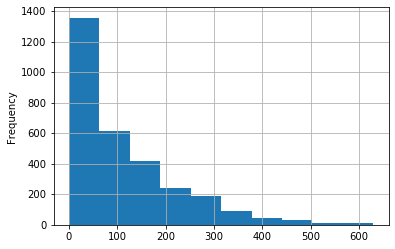

In [156]:
#looking at column lead time range
lead_times.plot(kind='hist', grid=True)

(array([468., 232., 162., 181., 137., 135., 132.,  99., 102., 112.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

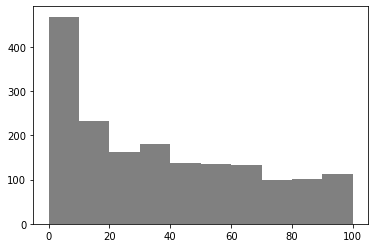

In [157]:
# through using plt
plt.hist(lead_times,range=[0, 100], facecolor='gray', align='mid')

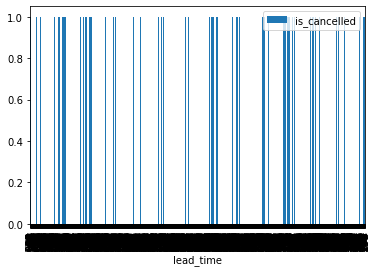

In [158]:
# now looking at their value in comparison to the result
data.plot(kind='bar',x='lead_time',y='is_cancelled')
plt.show()

In [159]:
#     measurement units: days
# arrival_week: the time they are supposed to arrive
#     questions to answer before looking: q1: is it in reference to the time they reeserved or is it week within the year
#     importance: low-high ( very unpredictable depending on questions being answered)
#     importance estimation:
#     values of consideration: longer arrival 
#     measurement units: weeks, but change to days when inferencing
# duration: Booking duration (in Days)
#     importance:medium
#     importance estimation: maybe in the short trips, people are likely to leave because they purchased on a whim
#     values of consideration: 1-10 days ---> DISCOVER SPECIFIC NUMBER LATER
# prev_cancel: Number of previous bookings that were cancelled by the customer prior to the current booking.
#     importance: very high
#     importance estimation: the higher the number, the more likely
#     values of consideration: maybe disregard 1 or 2 but if they develop a pattern, well it is extremely likely
# booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.
#     importance: high
#     importance estimation: the higher the value, the more investment they will make in completing the booking
#     values of consideration:
# waiting_period: Waiting period for booking confirmation (in Days)
#     importance: high
#     importance estimation: the longer the days it is that they pay money, the more likely they will realize they don't want to spend monay
#     values of consideration: maybe don't consider 
# per_Day_price: Per night booking price (in US $).
#     importance: moderate
#     importance estimation: maybe the costlier, the more likely?
#     values of consideration: 100 ------> depending on dataset
# parking: Number of car parking spaces required by the customer.
#     importance:
#     importance estimation:
#     values of consideration:
# special_request: Number of special requests made by the customer.
#     importance:
#     importance estimation:
#     values of consideration:
# segment: Market segment designation. In categories, “TA” means “Travel Agents” and “TO” means “Tour Operators”
#     importance:
#     importance estimation:
#     values of consideration:
# deposit: Whether the customer made a deposit to guarantee the booking.
#     importance:
#     importance estimation:
#     values of consideration:
# cast_type: Type of booking, assuming one of four categories.
#     importance:
#     importance estimation:
#     values of consideration:
# is_cancelled: Value indicating if the booking was cancelled (1) or not (0).


#lead_time:

In [ ]:
######END OF ATTEMPT #2 AND ATTEMPT #3 (SINCE THEY GO HAND IN HAND)    

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), you must predict whether a customer will cancel his booking or not. You should submit a CSV file with a header row and one row per test entry. 

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **is_cancelled**
   

In [ ]:
#SUBMITTING WHAT I HAVE SO I CAN FOCUS ON LEARNING RANDOMFORESTREGRESSOR

In [ ]:
#Submission

#submission_df.to_csv('submissions.csv',index=False)

In [ ]:
my_sample_submission.to_csv('submissions.csv',index=False)
